In [1]:
import pickle
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from compress_pickle import dump, load

In [9]:
prior_df = pd.read_csv('files/compiled_comments_3_14_2021.csv')
prior_df['Label'] = prior_df['action']
prior_df = prior_df.drop(['action'], axis = 1)
prior_df = prior_df.replace({'Label': {False: 0, True: 1}})

valid_df = pd.read_csv('validation/Validation Comments - Sheet1.csv')

In [10]:
# add validation comment df to function
def set_up_train_test_split(prior_df, valid_df, feature_list, target_name, test_size):
    valid_X = valid_df[feature_list]

    prior_X = prior_df[feature_list]

    valid_y = valid_df[target_name]

    prior_y = prior_df[target_name]

    rand_state = random.randint(0, 1000)
    valid_X_train, valid_X_test, valid_y_train, valid_y_test = train_test_split(valid_X, valid_y, test_size = test_size, random_state=rand_state)
    X_train, X_test, y_train, y_test = train_test_split(prior_X, prior_y, test_size = test_size, random_state=rand_state)
    
    for i in range(1,5):
        X_train = X_train.append(valid_X_train, ignore_index = True)
        y_train = y_train.append(valid_y_train, ignore_index = True)

        X_test = X_test.append(valid_X_test, ignore_index = True)
        y_test = y_test.append(valid_y_test, ignore_index = True)
        
    return X_train, X_test, y_train, y_test

def determine_accuracy(y_test, y_val):
    percent_arr = (y_test == y_val)
    count = np.count_nonzero(percent_arr)
    percentage = (count/(len(percent_arr)))*100
    return percentage

Percentage correct: 78.57142857142857



array([0, 0, 0, ..., 0, 0, 0])

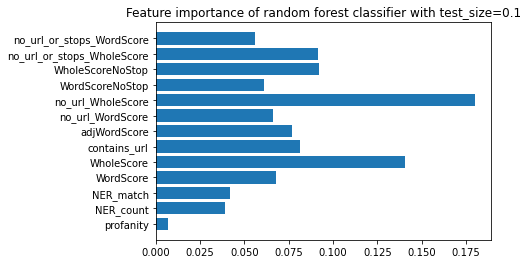

In [13]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
def random_forest_class_func(prior_df, valid_df, feature_list, target_name, test_size, estimators):
    #set up training and testing split
    X_train, X_test, y_train, y_test = set_up_train_test_split(prior_df, valid_df, feature_list, target_name, test_size)
    
    #fit ridge classifier to x and y training set
    clf = RandomForestClassifier(n_estimators = estimators).fit(X_train, y_train)
    
    #pickle the model
    fname1 = "updated_model.pkl"
    #dump(clf, fname1)
    dump(clf, fname1, compression="lzma", set_default_extension=False)
    
    importances = clf.feature_importances_
    
    #Predict with ridge classifier on x and y testing set
    y_val = clf.predict(X_test)
    
    #report the correct percentage of predictions
    percentage = determine_accuracy(y_test, y_val)
    
    #Send data to csv to keep track of data
    data = [[feature_list, test_size, percentage, estimators]]
    return_df = pd.DataFrame(data, columns = ['features', 'test size', 'percent correct', 'n_estimators'])
    return_df.to_csv('files/ML_Results/RandomForestClassifier_Results.csv', mode='a', header=False, index=False)
    
    print('Percentage correct: ' + str(percentage) + '\n')
    plt.barh(feature_list, importances)
    plt.title('Feature importance of random forest classifier with test_size=' + str(test_size))
    
    return y_val

features = ['profanity', 'NER_count', 'NER_match', 'WordScore', 'WholeScore', 'contains_url', 
            'adjWordScore', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 
            'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore']
test = random_forest_class_func(prior_df, valid_df, features, 'Label', 0.1, 1000)
test

In [14]:
#To load the model, run the following
import pickle
from compress_pickle import dump, load
model = load("updated_model.pkl", compression="lzma", set_default_extension=False)

#Then do whatever you need to with the model variable

In [18]:
#Double checking that the model variable still works. It does
features = ['profanity', 'NER_count', 'NER_match', 'WordScore', 'WholeScore', 'contains_url', 
            'adjWordScore', 'no_url_WordScore', 'no_url_WholeScore', 'WordScoreNoStop', 'WholeScoreNoStop', 
            'no_url_or_stops_WholeScore', 'no_url_or_stops_WordScore']
X_train, X_test, y_train, y_test = set_up_train_test_split(prior_df, valid_df, features, 'Label', 0.1)
y_val = model.predict(X_test)
percentage = determine_accuracy(y_test, y_val)
percentage

98.80952380952381